In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# load node2vec+ results
result_df = pd.read_csv('../result/gene_classification_n2vplus.csv')
optim_idx_ary = result_df.groupby(['Network', 'Method', 'Task', 'gamma'])['Validation score'].agg('idxmax').values
result_df = result_df.iloc[optim_idx_ary]
result_df

,Training score,Validation score,Testing score,Task,Dataset,Network,Method,p,q,gamma
13299,1.255766,1.738003,1.857641,DOID:0050534,DisGeNet,GIANT-TN,Node2vec+,0.1,0.10,0.0
17732,2.263329,1.931042,0.594869,DOID:0050534,DisGeNet,GIANT-TN,Node2vec+,10.0,0.10,1.0
13156,4.640455,2.567656,3.614469,DOID:0050534,DisGeNet,GIANT-TN,Node2vec+,0.1,0.01,2.0
14587,1.415290,2.602192,0.357781,DOID:0050565,DisGeNet,GIANT-TN,Node2vec+,0.1,1.00,0.0
18162,3.158056,2.770758,1.480612,DOID:0050565,DisGeNet,GIANT-TN,Node2vec+,10.0,100.00,1.0
...,...,...,...,...,...,...,...,...,...,...
26464,3.636710,3.878580,2.942131,GO:0090150,GOBP,STRING,Node2vec+,100.0,100.00,1.0
27784,3.617252,3.998562,2.464563,GO:0090150,GOBP,STRING,Node2vec+,10.0,0.01,2.0
31085,2.893543,3.443247,1.901371,GO:0097190,GOBP,STRING,Node2vec+,1.0,1.00,0.0
30821,3.062134,3.356570,2.161878,GO:0097190,GOBP,STRING,Node2vec+,1.0,10.00,1.0


GIANT-TN


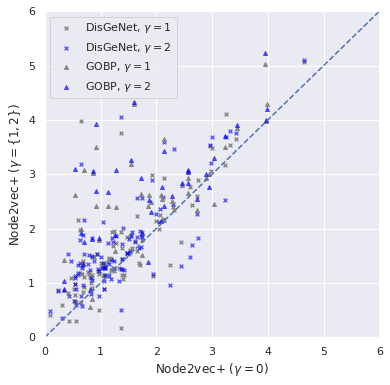

GIANT-TN-c01


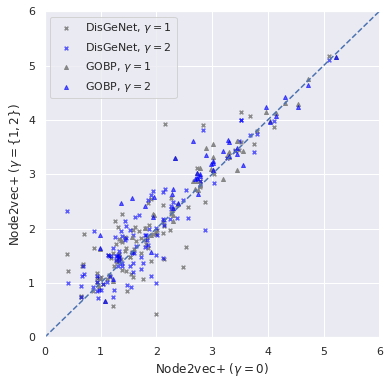

STRING


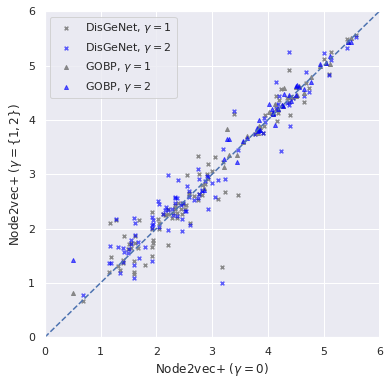

In [3]:
lim = (0, 6)
marker_dict = {
    "GOBP": ("^", 16),
    "DisGeNet": ("x", 14),
}

for network_name, network_group in result_df.groupby("Network"):
    plt.figure(figsize=(6, 6))
    datasets = []
    for dataset_name, dataset_group in network_group.groupby("Dataset"):
        datasets.append(dataset_name)
        score_dict = {
            int(i): j.sort_values('Task')['Validation score'].values
            for i, j in dataset_group.groupby('gamma')
        }
        marker, size = marker_dict[dataset_name]
        plt.scatter(score_dict[0], score_dict[1], color="grey", s=size, alpha=0.9, marker=marker)
        plt.scatter(score_dict[0], score_dict[2], color="blue", s=size, alpha=0.6, marker=marker)

    plt.xlim(lim)
    plt.ylim(lim)
    plt.xlabel("Node2vec+ ($\gamma = 0$)")
    plt.ylabel("Node2vec+ ($\gamma = \{1, 2\}$)")
    plt.legend(
        [
            f"{datasets[0]}, $\gamma=1$",
            f"{datasets[0]}, $\gamma=2$",
            f"{datasets[1]}, $\gamma=1$",
            f"{datasets[1]}, $\gamma=2$",
        ]
    )
    plt.plot(lim, lim, '--')
    print(network_name)
#     plt.savefig(f"fig_bio_nc_n2vplus_gamma_{network_name}.png", dpi=300, bbox_inches='tight') # uncomment to save
    plt.show()